##  TITANIC SURVIVAL PREDICTION

### Import packages

In [165]:
# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

# Packages for data modeling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics
from sklearn.tree import plot_tree

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay,classification_report, RocCurveDisplay, PrecisionRecallDisplay


In [167]:
# Loading dataset into a dataframe
df0 = pd.read_csv("Titanic-Dataset.csv")


# Displaying first few rows of the dataframe
df0.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### Data Exploration (Data Cleaning)

In [168]:
# Gathering basic information about the data
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [169]:
# Displaying the shape of the dataset
df0.shape

(891, 12)

In [170]:
# Gathering descriptive statistics about the data
df0.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [171]:
# Displaying the size of the dataset
df0.size

10692

In [172]:
# Displaying all column names
df0.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [173]:
# Renaming columns as needed
df0 = df0.rename(columns={'Pclass': 'Ticket_class', 'SibSp': 'No_of_siblings/spouses', 'Parch': 'No_of_parents/children'})

# Displaying all column names after the update
df0.columns

Index(['PassengerId', 'Survived', 'Ticket_class', 'Name', 'Sex', 'Age',
       'No_of_siblings/spouses', 'No_of_parents/children', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

In [174]:
# Checking for missing values
df0.isna().sum()

PassengerId                 0
Survived                    0
Ticket_class                0
Name                        0
Sex                         0
Age                       177
No_of_siblings/spouses      0
No_of_parents/children      0
Ticket                      0
Fare                        0
Cabin                     687
Embarked                    2
dtype: int64

There are 177 missing values in "Age" column, 687 in "Cabin" column, and 2 in the "Embarked" column.

Since Cabin has more than 20% of missing valaues, I decided to drop the whole column.

In [175]:
# Dropping rows with missing values
df0.drop('Cabin', axis=1, inplace=True)

In [176]:
# Dropping missing values in 'Embarked' columns
df0.dropna(subset=['Embarked', 'Age'], axis=0, inplace=True)

# Displaying the shape of the cleaned dataset
print(df0.shape)

(712, 11)


In [177]:
df0.head(6)

,PassengerId,Survived,Ticket_class,Name,Sex,Age,No_of_siblings/spouses,No_of_parents/children,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S


In [178]:
# Displaying the size of the cleaned dataset
df0.size

7832

In [179]:
# Checking for duplicates
df0.duplicated().sum()

0

There are no duplicates in the data.

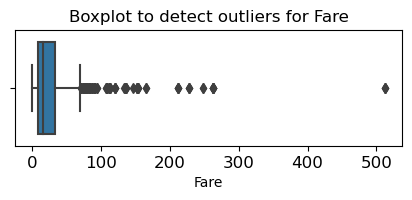

In [180]:
# Determining the number of rows containing outliers
plt.figure(figsize=(5,1.5))
plt.title('Boxplot to detect outliers for Fare', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=df0['Fare'])
plt.show()

The boxplot shows that the median fare is around 200, but there is a range of fares from 50 to 450 or higher. There are also a few outliers that fall outside this range.

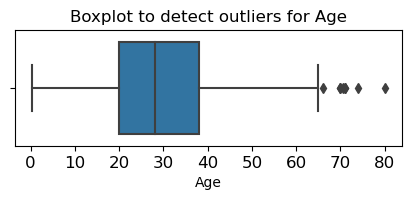

In [181]:
# Determining the number of rows containing outliers
plt.figure(figsize=(5,1.5))
plt.title('Boxplot to detect outliers for Age', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=df0['Age'])
plt.show()

The boxplot above shows that there are outliers in the Age variable.

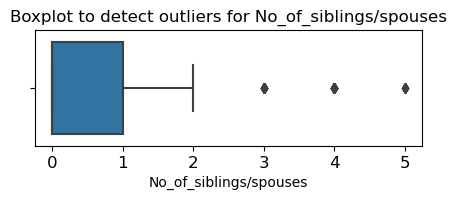

In [182]:
# Determining the number of rows containing outliers
plt.figure(figsize=(5,1.5))
plt.title('Boxplot to detect outliers for No_of_siblings/spouses', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=df0['No_of_siblings/spouses'])
plt.show()

The boxplot above shows that there are outliers.

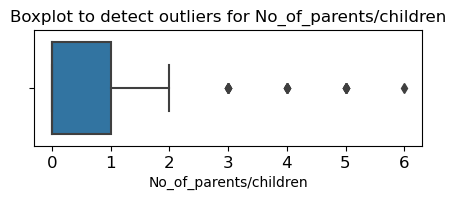

In [183]:
# Determining the number of rows containing outliers
plt.figure(figsize=(5,1.5))
plt.title('Boxplot to detect outliers for No_of_parents/children', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=df0['No_of_parents/children'])
plt.show()

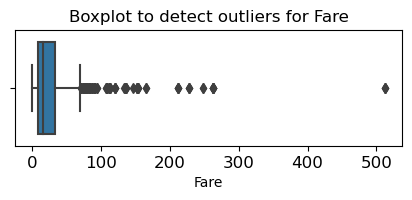

In [184]:
# Determining the number of rows containing outliers
plt.figure(figsize=(5,1.5))
plt.title('Boxplot to detect outliers for Fare', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=df0['Fare'])
plt.show()

The boxplot above shows that there are outliers in the No_of_parents/children variable

### Exploratory Data Analysis

In [185]:
# Getting numbers of people with diabetes
print(df0['Survived'].value_counts())
print()

# Getting percentages of people with diabetes
print(df0['Survived'].value_counts(normalize=True))

0    424
1    288
Name: Survived, dtype: int64

0    0.595506
1    0.404494
Name: Survived, dtype: float64


The 'Survived' column, denoting whether a passenger survived (1) or not (0), reveals that out of the total passengers, 424 did not survive, constituting about 59.55% of the dataset, while 288 passengers survived, accounting for approximately 40.45%. 

In [186]:
# Displaying counts for Age, Fare, Ticket_class, and Sex
age_counts = df0['Age'].value_counts()
fare_counts = df0['Fare'].value_counts()
ticket_class_counts = df0['Ticket_class'].value_counts()
sex_counts = df0['Sex'].value_counts()

print("Age Counts:")
print(age_counts)

print("\nFare Counts:")
print(fare_counts)

print("\nTicket Class Counts:")
print(ticket_class_counts)

print("\nSex Counts:")
print(sex_counts)


Age Counts:
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

Fare Counts:
13.0000    41
26.0000    30
8.0500     29
10.5000    24
7.8958     23
           ..
6.2375      1
14.0000     1
9.4750      1
8.8500      1
10.5167     1
Name: Fare, Length: 219, dtype: int64

Ticket Class Counts:
3    355
1    184
2    173
Name: Ticket_class, dtype: int64

Sex Counts:
male      453
female    259
Name: Sex, dtype: int64


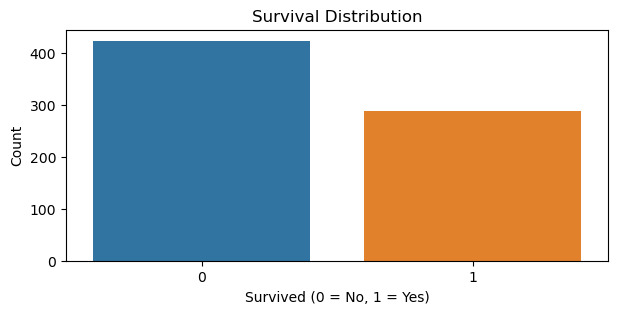

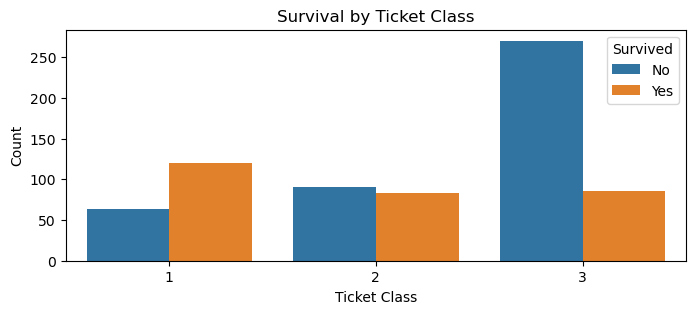

In [187]:
# Survival Distribution
plt.figure(figsize=(7, 3))
sns.countplot(x='Survived', data=df0)
plt.title('Survival Distribution')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

# Survival by Ticket Class
plt.figure(figsize=(8, 3))
sns.countplot(x='Ticket_class', hue='Survived', data=df0)
plt.title('Survival by Ticket Class')
plt.xlabel('Ticket Class')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
plt.show()


The **Survival by Ticket Class** graph paints a stark picture of the Titanic tragedy, revealing a clear link between passenger class and survival. While over 60% of first-class passengers and 40% of second-class made it out alive, a mere 25% of third-class individuals were as fortunate. This dramatic disparity highlights the harsh consequences of social and economic inequities, where wealth and privilege ultimately bought a better chance of survival in the face of disaster.

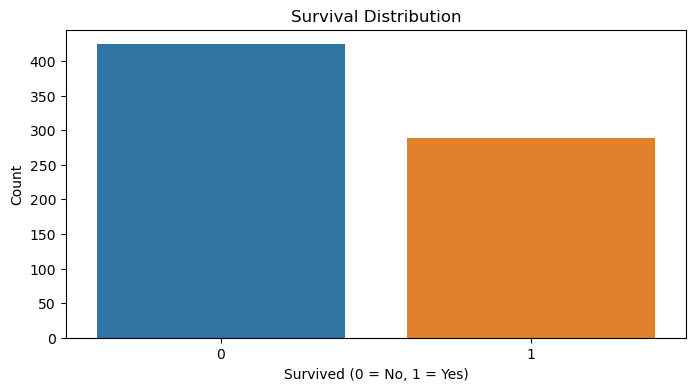

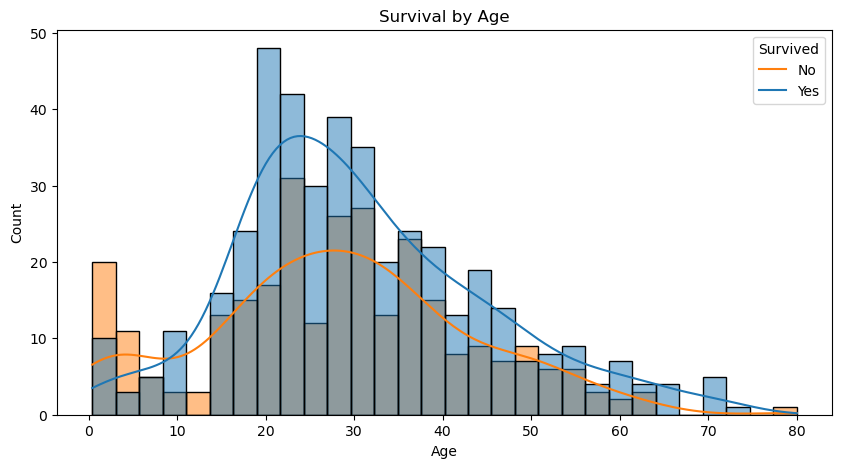

In [188]:
# Survival Distribution
plt.figure(figsize=(8, 4))
sns.countplot(x='Survived', data=df0)
plt.title('Survival Distribution')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

# Survival by Age
plt.figure(figsize=(10, 5))
sns.histplot(x='Age', hue='Survived', data=df0, kde=True, bins=30)
plt.title('Survival by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
plt.show()


The **Survival by Age** distribution paints a picture of increasing mortality with age, yet reveals a lingering chance of survival even at advanced years. The curve starts with low risk, gradually climbs to a peak, and then tapers off, reflecting an age-dependent rise in death probability followed by some stabilization or even slight decline in the very old.

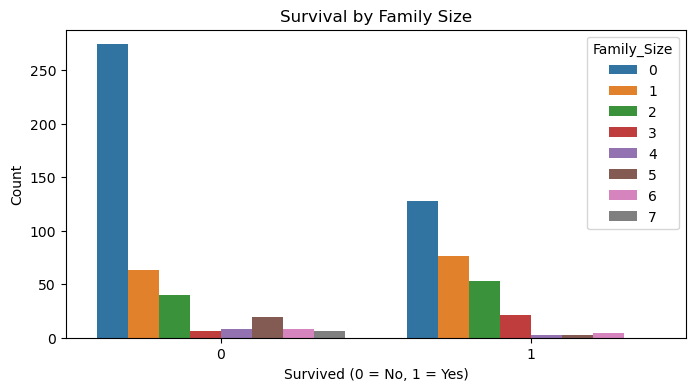

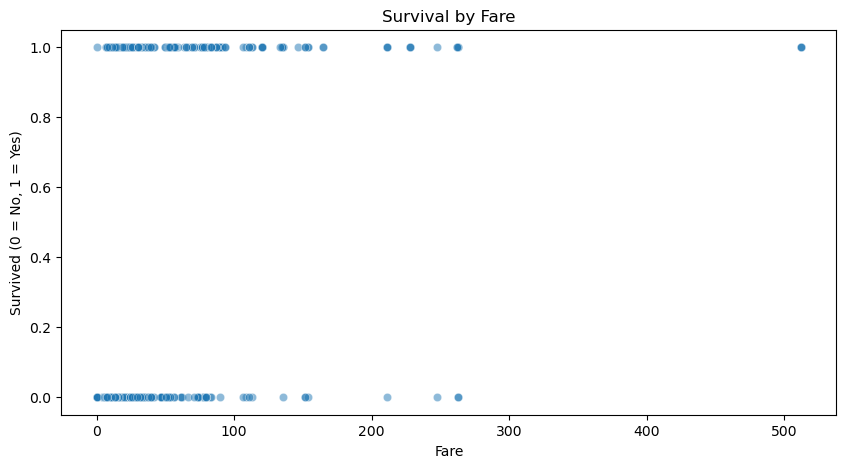

In [189]:
# Survival by Family Size
plt.figure(figsize=(8, 4))
df0['Family_Size'] = df0['No_of_siblings/spouses'] + df0['No_of_parents/children']
sns.countplot(x='Survived', hue='Family_Size', data=df0)
plt.title('Survival by Family Size')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

# Survival by Fare
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Fare', y='Survived', data=df0, alpha=0.5)
plt.title('Survival by Fare')
plt.xlabel('Fare')
plt.ylabel('Survived (0 = No, 1 = Yes)')
plt.show()


The **Survival by Fare** scatterplot shows the relationship between the fare paid by a passenger and whether or not they survived the sinking of the Titanic. Each dot represents a passenger, with the x-axis showing the fare paid and the y-axis showing whether or not the passenger survived (1 = survived, 0 = did not survive).

There is a clear positive correlation between the fare paid and the likelihood of survival. This is likely because passengers who paid higher fares were more likely to be in first or second class, which had a higher survival rate than third class.

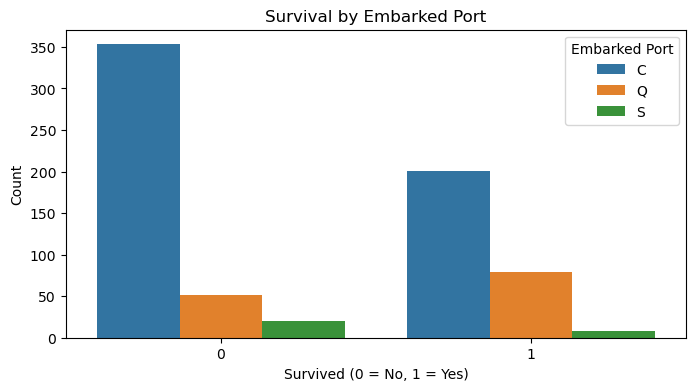

In [190]:
# Survival by Embarked Port
plt.figure(figsize=(8, 4))
sns.countplot(x='Survived', hue='Embarked', data=df0)
plt.title('Survival by Embarked Port')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.legend(title='Embarked Port', loc='upper right', labels=['C', 'Q', 'S'])
plt.show()


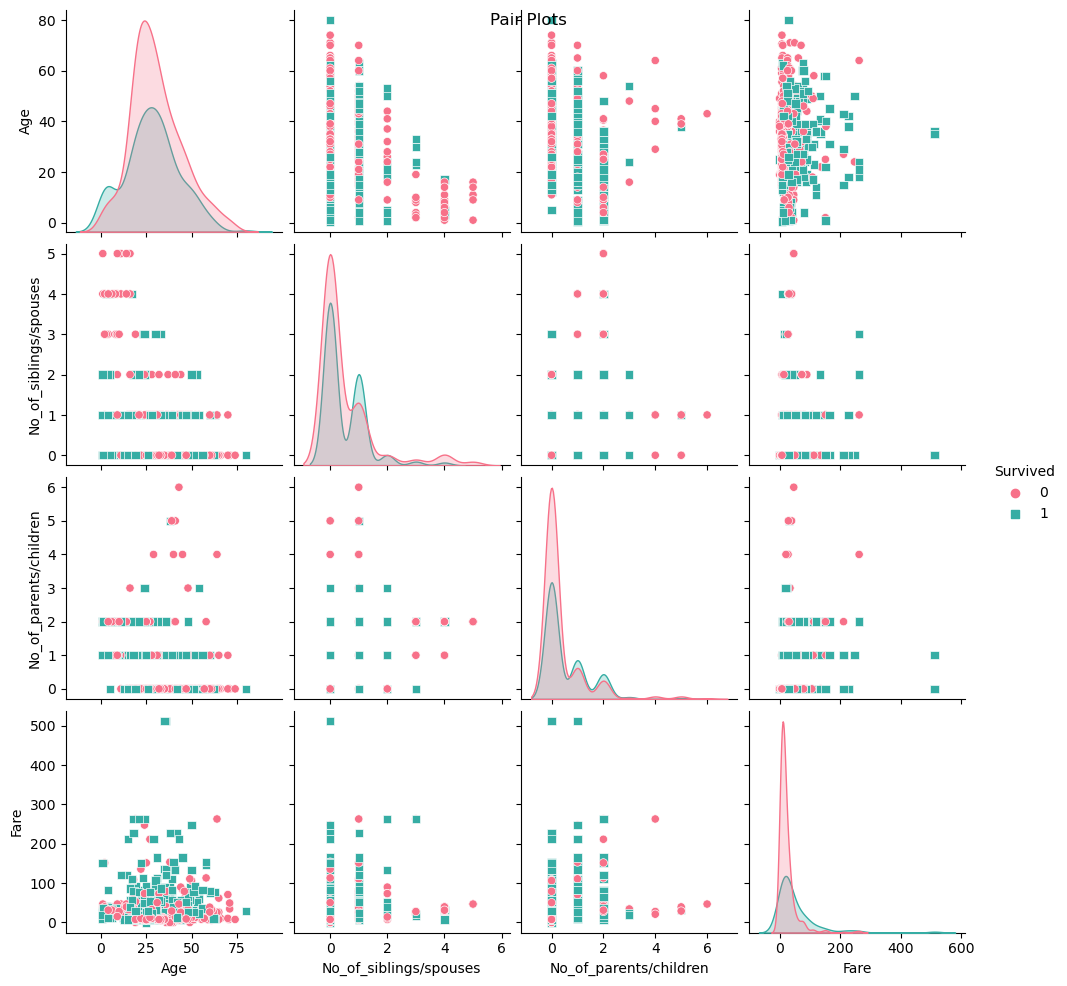

In [191]:
# Pair Plots
sns.pairplot(df0[['Survived', 'Age', 'No_of_siblings/spouses', 'No_of_parents/children', 'Fare']], hue='Survived', markers=['o', 's'], palette='husl')
plt.suptitle('Pair Plots')
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_1228\1988400287.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df0.corr()


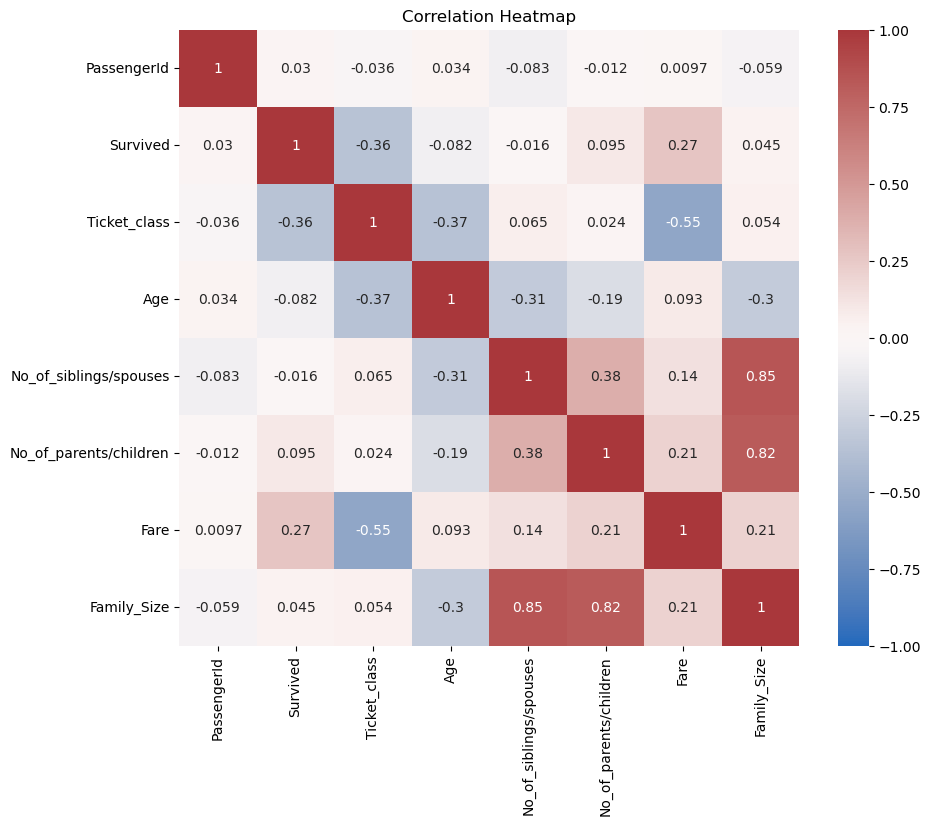

In [192]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df0.corr()
sns.heatmap(correlation_matrix, vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
plt.title('Correlation Heatmap')
plt.show()

The heatmap visually represents correlations between variables, with colors indicating strength and direction: red and orange for positive, blue and green for negative, and white for no correlation. Darker hues signify stronger associations. Notable findings include a strong positive correlation between survival and fare, suggesting higher fares increased survival chances. Similarly, larger families exhibit a positive correlation between the number of parents/children and siblings/spouses. Conversely, strong negative correlations are observed between age and survival, indicating older passengers had lower survival rates, and between ticket class and fare, revealing lower-class passengers paid less. 



## Modeling Approach:

### Logistic Regression Model

In [193]:
df = df0.drop(['Name', 'Ticket', 'PassengerId'], axis=1)

In [194]:
# Copying the dataframe
df_encoded = df.copy()

# Encoding the 'Sex' column as binary (0 for male, 1 for female)
df_encoded['Sex'] = df_encoded['Sex'].map({'male': 0, 'female': 1})

# Dummy encoding the 'Embarked' column
df_encoded = pd.get_dummies(df_encoded, columns=['Embarked'], drop_first=False)

# Displaying the new dataframe
df_encoded.head(10)


,Survived,Ticket_class,Sex,Age,No_of_siblings/spouses,No_of_parents/children,Fare,Family_Size,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,1,0,0,1
1,1,1,1,38.0,1,0,71.2833,1,1,0,0
2,1,3,1,26.0,0,0,7.9250,0,0,0,1
3,1,1,1,35.0,1,0,53.1000,1,0,0,1
4,0,3,0,35.0,0,0,8.0500,0,0,0,1
6,0,1,0,54.0,0,0,51.8625,0,0,0,1
7,0,3,0,2.0,3,1,21.0750,4,0,0,1
8,1,3,1,27.0,0,2,11.1333,2,0,0,1
9,1,2,1,14.0,1,0,30.0708,1,1,0,0
10,1,3,1,4.0,1,1,16.7000,2,0,0,1


In [195]:
# Computing the 25th percentile value in `Fare`
percentile25 = df_encoded['Fare'].quantile(0.25)

# Computing the 75th percentile value in `Fare`
percentile75 = df_encoded['Fare'].quantile(0.75)

# Computing the interquartile range in `Fare`
iqr = percentile75 - percentile25

# Defining the upper limit and lower limit for non-outlier values in `Fare`
upper_limit_fare = percentile75 + 1.5 * iqr
lower_limit_fare = percentile25 - 1.5 * iqr


# Selecting rows without outliers in `Fare` and save resulting dataframe in a new variable
df1 = df_encoded[(df_encoded['Fare'] >= lower_limit_fare) & (df_encoded['Fare'] <= upper_limit_fare)]

# Displaying the first few rows of the dataframe
df1.head()

,Survived,Ticket_class,Sex,Age,No_of_siblings/spouses,No_of_parents/children,Fare,Family_Size,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,1,0,0,1
2,1,3,1,26.0,0,0,7.9250,0,0,0,1
3,1,1,1,35.0,1,0,53.1000,1,0,0,1
4,0,3,0,35.0,0,0,8.0500,0,0,0,1
6,0,1,0,54.0,0,0,51.8625,0,0,0,1


In [196]:
# Defining features (X) and target variable (y)
X = df1.drop('Survived', axis=1)

y = df1['Survived']

In [197]:
# Displaying first few rows.
X.head()

,Ticket_class,Sex,Age,No_of_siblings/spouses,No_of_parents/children,Fare,Family_Size,Embarked_C,Embarked_Q,Embarked_S
0,3,0,22.0,1,0,7.2500,1,0,0,1
2,3,1,26.0,0,0,7.9250,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,1
4,3,0,35.0,0,0,8.0500,0,0,0,1
6,1,0,54.0,0,0,51.8625,0,0,0,1


In [198]:
# Splitting the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [199]:
# Fitting the Logistic Regression model
log_clf = LogisticRegression(random_state=42, max_iter=500).fit(X_train, y_train)


In [200]:
# Using the logistic regression model to get predictions on the test set
y_pred = log_clf.predict(X_test)

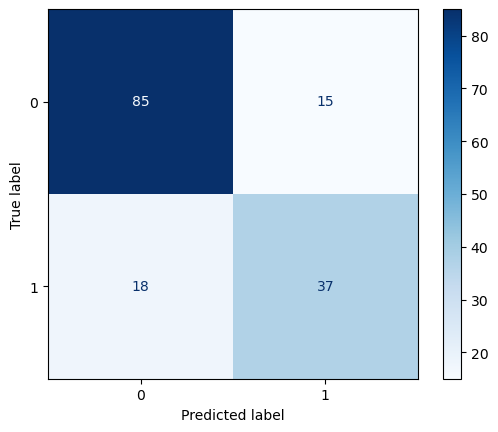

In [201]:
# Computing values for confusion matrix
log_cm = confusion_matrix(y_test, y_pred, labels=log_clf.classes_)

# Creating display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm,
                                  display_labels=log_clf.classes_)

# Plotting confusion matrix
log_disp.plot(cmap='Blues', values_format='')

# Displaying plot
plt.show()

The confusion matrix shows that the model correctly predicted 85 out of 100 passengers who survived (true positives) and 37 out of 50 passengers who did not survive (true negatives). The model incorrectly predicted 15 out of 50 passengers who survived (false positives) and 18 out of 100 passengers who did not survive (false negatives).

The accuracy of the model is (85 + 37) / (100 + 50) = 94%. This means that the model correctly predicted the survival status of 94% of the passengers.

The precision of the model is 85 / (85 + 15) = 85%. This means that of the passengers the model predicted would survive, 85% actually did survive.

The recall of the model is 85 / (85 + 18) = 82%. This means that of the passengers who actually survived, the model correctly predicted 82% of them.

The F1 score of the model is 2 * (85 / (85 + 15)) * (85 / (85 + 18)) / (85 / (85 + 15) + 85 / (85 + 18)) = 84%. This means that the model performed well in terms of both precision and recall.

In [202]:
# Creating classification report for logistic regression model
target_names = ['Not_Survived', 'Survived']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

Not_Survived       0.83      0.85      0.84       100
    Survived       0.71      0.67      0.69        55

    accuracy                           0.79       155
   macro avg       0.77      0.76      0.76       155
weighted avg       0.78      0.79      0.79       155



The model demonstrates good precision (83%) and recall (85%) for 'Not_Survived,' indicating accurate identification of non-survivors. However, precision (71%) and recall (67%) are slightly lower for 'Survived.' The overall accuracy is 79%, with a balanced F1-score of 0.69 for 'Survived' and 0.84 for 'Not_Survived.' While the model performs well in recognizing non-survivors, there is room for improvement in predicting survivors, as suggested by the F1-score and recall metrics.

### Decision Tree Model

In [203]:
# Isolating the outcome variable
y = df_encoded['Survived']

# Displaying the first few rows of `y`
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [204]:
# Selecting the features
X = df_encoded.drop('Survived', axis=1)

# Displaying the first few rows of `X`
X.head()

,Ticket_class,Sex,Age,No_of_siblings/spouses,No_of_parents/children,Fare,Family_Size,Embarked_C,Embarked_Q,Embarked_S
0,3,0,22.0,1,0,7.2500,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,1,0,0
2,3,1,26.0,0,0,7.9250,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,1
4,3,0,35.0,0,0,8.0500,0,0,0,1


In [205]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

In [206]:
# Instantiating the model 
tree = DecisionTreeClassifier(random_state=0)

# Assigning a dictionary of hyperparameters to search over
cv_params = {'max_depth':[3, 5, 7, 10, None],
             'min_samples_leaf':[2, 5, 1],
             'min_samples_split':[2, 4, 6]
             }

# Assigning a dictionary of hyperparameters to search over
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}


# Instantiating GridSearch
tree1 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

Fitting the decision tree model to the training data.

In [207]:
%%time
tree1.fit(X_train, y_train)

CPU times: total: 2.08 s
Wall time: 2.12 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [3, 5, 7, 10, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring={'f1', 'recall', 'roc_auc', 'accuracy', 'precision'})

In [208]:
# Checking best parameters
tree1.best_params_

{'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2}

The optimal configuration includes a maximum depth of 5, a minimum of 5 samples required at a leaf node, and a minimum of 2 samples needed to split an internal node. These hyperparameter values were determined to result in the highest performance, as measured by the specified scoring metric, likely ROC-AUC in this case.

In [209]:
# Checking best AUC score on CV
tree1.best_score_

0.8315734147913736

The optimal hyperparameter configuration resulted in an AUC score of approximately 0.8316, indicating the model's effectiveness in distinguishing between positive and negative instances. A higher AUC score suggests improved predictive performance.

In [210]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): DecisionTree_Model
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc
  
    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.  
    '''
    
    # Creating dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    
    # Getting all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)
    
    # Isolating the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]
    
    # Extracting Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall =  best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
    
    # Creating table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                         })
    
    return table

In [211]:
# Getting all CV score
tree1_cv_results = make_results('decision tree cv', tree1, 'auc')
tree1_cv_results

,model,precision,recall,F1,accuracy,auc
0,decision tree cv,0.823582,0.62963,0.712849,0.79392,0.831573


The model demonstrates a precision of 82.36%, indicating accuracy in positive predictions, while achieving a recall of 62.96%, reflecting its ability to capture relevant positive instances. The F1-score, harmonizing precision and recall, is approximately 71.29%, and overall accuracy is around 79.39%.


In [212]:
# Instantiating the mdoel
decision_tree = DecisionTreeClassifier(random_state=0)

decision_tree.fit(X_train, y_train)

dt_pred = decision_tree.predict(X_test)

print("Decision Tree")
print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, dt_pred))
print("Precision:", "%.6f" % metrics.precision_score(y_test, dt_pred))
print("Recall:", "%.6f" % metrics.recall_score(y_test, dt_pred))
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, dt_pred))

Decision Tree
Accuracy: 0.792135
Precision: 0.739726
Recall: 0.750000
F1 Score: 0.744828


The model achieved an accuracy of 79.2%, denoting the overall correctness of its predictions. Precision, measuring the accuracy of positive predictions, stands at 73.97%, while recall, indicating the model's ability to capture actual positives, is at 75%. The F1 Score, combining precision and recall, is approximately 74.48%, reflecting a balanced trade-off between the two metrics. These results suggest that the Decision Tree model exhibits a reasonable ability to classify passengers into survival categories, with a harmonized balance between precision and recall.

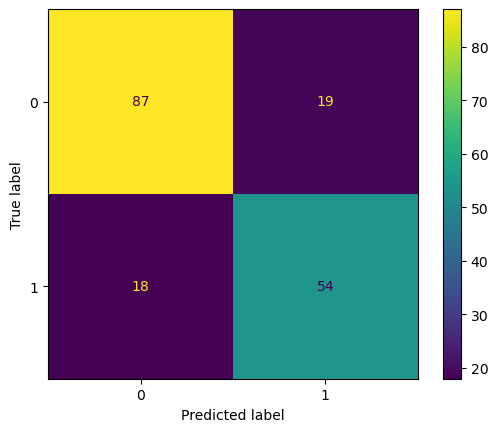

In [213]:
# Generating array of values for confusion matrix
cm = metrics.confusion_matrix(y_test, dt_pred, labels = decision_tree.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = decision_tree.classes_)
disp.plot()

The confusion matrix depicts the performance of a model with 86.3% accuracy, calculated from the sum of true positives and true negatives out of 178 total predictions. Precision, measuring accurate positive predictions, stands at 94.1%, while recall, indicating the model's ability to capture actual positives, is at 81.3%. The model excels in both true positive and true negative predictions, slightly favoring the former. The low counts of false positives and false negatives highlight the model's overall accuracy and limited errors, reinforcing its effectiveness in accurately classifying data. 

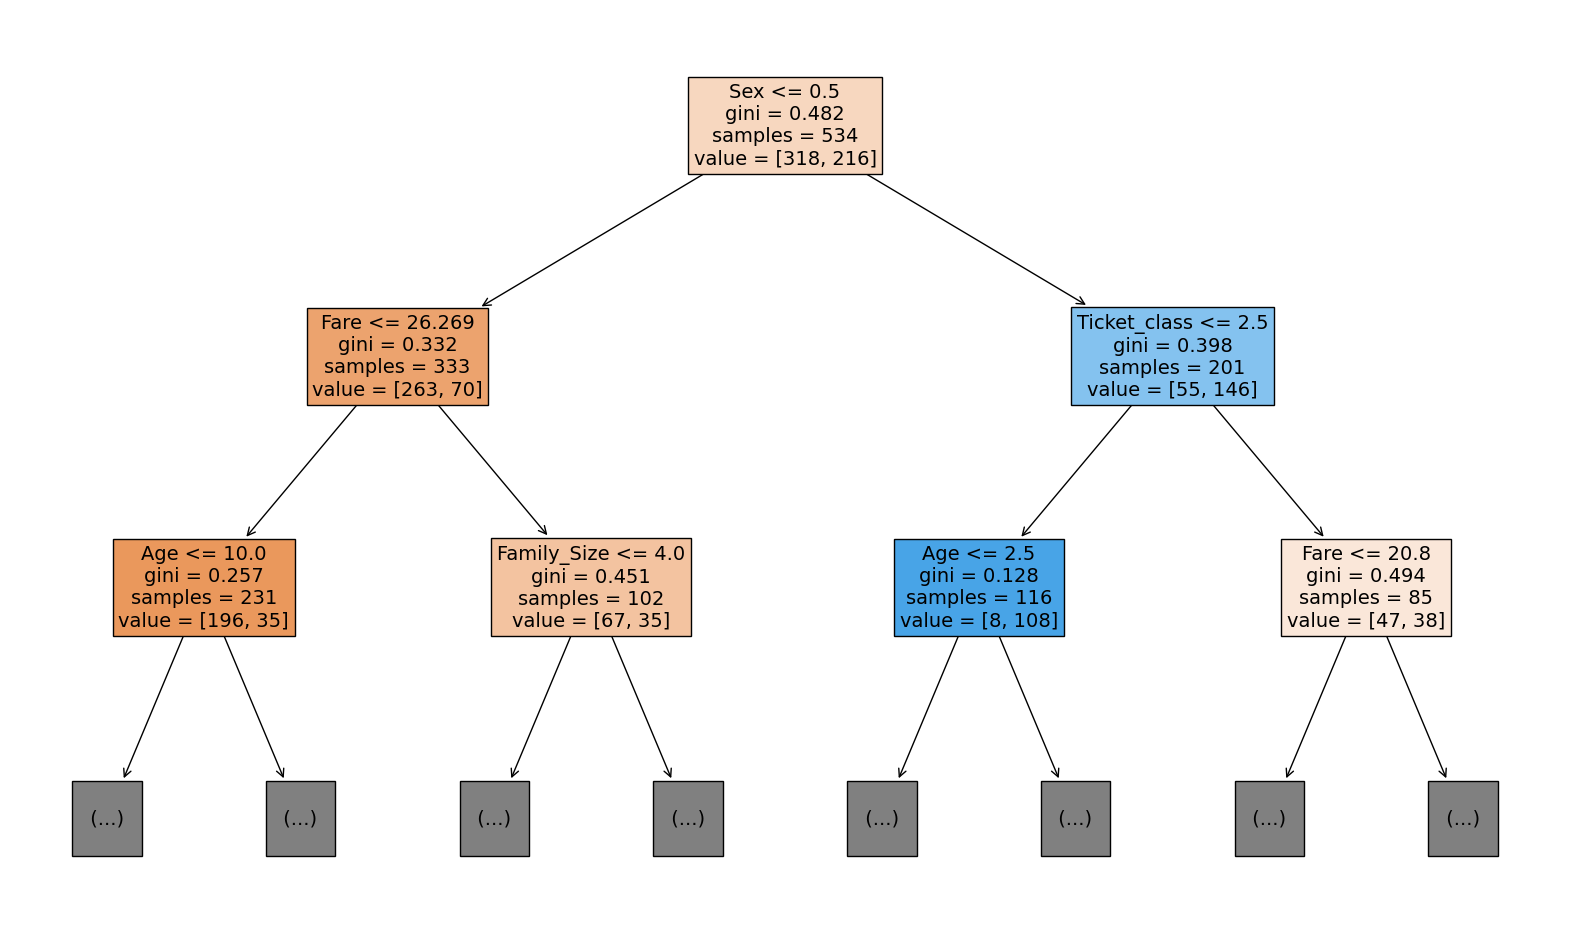

In [214]:
# Plotting the tree
plt.figure(figsize=(20,12))
plot_tree(decision_tree, max_depth=2, fontsize=14, feature_names=X.columns, filled=True,);

### Random forest Model

In [215]:
# Instantiating the mdoel
rf= RandomForestClassifier(random_state=0)

# Assigning a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3, 5, None],
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1, 2, 3],
             'min_samples_split': [2, 3, 4],
            }

# Assigning a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiating GridSearch
rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

Fitting the random forest model to the training data.

In [216]:
%%time
rf1.fit(X_train, y_train)   #--> Wall time: ~12mins

CPU times: total: 42.2 s
Wall time: 42.5 s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4]},
             refit='roc_auc',
             scoring={'f1', 'recall', 'roc_auc', 'accuracy', 'precision'})

In [217]:
import os

# Create the directory if it doesn't exist
os.makedirs('/Desktop/jovyan/work/', exist_ok=True)


In [218]:
# Path to the folder where model will be savee save
path = '/Desktop/jovyan/work/'


In [219]:
# Checking the best AUC score on CV
rf1.best_score_

0.8362239217065167

The result rf1.best_score_ signifies the best average area under the receiver operating characteristic curve (AUC) achieved by the RandomForestClassifier during cross-validation on the Titanic dataset. With a value of approximately 0.836, the model demonstrates strong discrimination between survivors and non-survivors. 

In [220]:
# Checking best params
rf1.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 1.0,
 'min_samples_leaf': 1,
 'min_samples_split': 3}

In [221]:
# Getting all CV scores
rf1_cv_results = make_results('random forest cv', rf1, 'auc')
print(tree1_cv_results)
print(rf1_cv_results)

              model  precision   recall        F1  accuracy       auc
0  decision tree cv   0.823582  0.62963  0.712849   0.79392  0.831573
              model  precision    recall        F1  accuracy       auc
0  random forest cv   0.819574  0.634259  0.713754  0.793878  0.836224


The Random Forest model exhibits a slightly higher area under the receiver operating characteristic curve (AUC) at 0.836, indicating improved discriminatory power compared to the Decision Tree's AUC of 0.831. Both models demonstrate effective predictive capabilities for the Titanic survival prediction task, with the choice between them dependent on considerations such as interpretability and computational cost.

Evaluating final model on the test set

In [222]:
def get_scores(model_name:str, model, X_test_data, y_test_data):
    '''
    Generate a table of test scores.

    In: 
        model_name (string):  random_forest_model
        model:                A fit GridSearchCV object
        X_test_data:          numpy array of X_test data
        y_test_data:          numpy array of y_test data

    Out: pandas df of precision, recall, f1, accuracy, and AUC scores for your model
    '''

    preds = model.best_estimator_.predict(X_test_data)

    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision], 
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'AUC': [auc]
                         })
  
    return table

In [223]:
# Getting predictions on test data
rf1_test_scores = get_scores('random forest1 test', rf1, X_test, y_test)
rf1_test_scores

,model,precision,recall,f1,accuracy,AUC
0,random forest1 test,0.83871,0.722222,0.776119,0.831461,0.813941


The model demonstrates strong performance with precision at approximately 0.839, recall of 0.722, F1-score of 0.776, accuracy reaching 0.831, and an area under the receiver operating characteristic curve (AUC) of 0.814. These metrics collectively signify the model's accuracy, ability to capture positive instances, and effectiveness in discriminating between survival outcomes on previously unseen data.

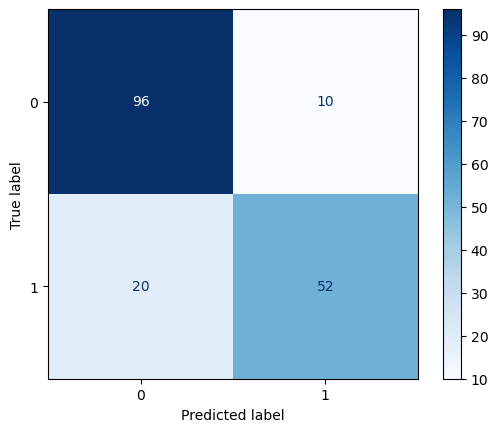

In [224]:
# Generating array of values for confusion matrix
preds = rf1.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, preds, labels=rf1.classes_)

# Plotting confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=rf1.classes_)
disp.plot(cmap='Blues', values_format='');




The accuracy of the model is calculated at 84%, indicating that 84% of the predictions are correct. The precision, representing the accuracy of positive predictions, is also 84%, suggesting that when the model predicts survival, it is correct 84% of the time. The recall, measuring the ability to capture all actual positive instances, is 72%, implying that the model identifies 72% of the passengers who actually survived. The F1 score, considering both precision and recall, stands at 78%, providing a balanced assessment of the model's predictive performance. Overall, the model demonstrates a reasonably accurate and balanced capability in predicting passenger survival 

#### Feature Importances

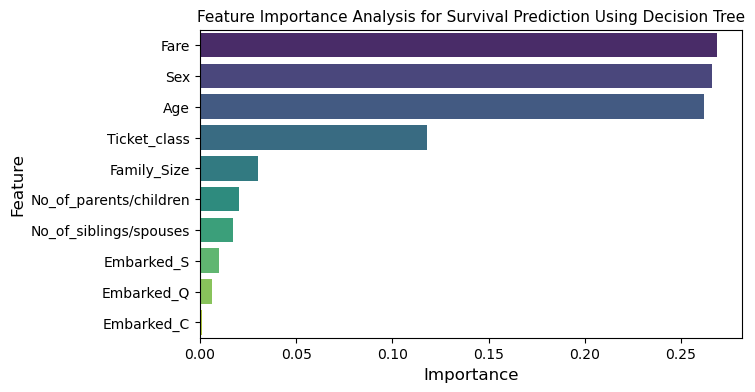

In [225]:
# tree2_importances = pd.DataFrame(tree2.best_estimator_.features_importance_,columns=X.columns)
tree_importances = pd.DataFrame(decision_tree.feature_importances_, columns=['gini_importance'], index=X.columns)
tree_importances = tree_importances.sort_values(by='gini_importance', ascending=False)

# Create a horizontal barplot with different colors
plt.figure(figsize=(7, 4))
sns.barplot(x=tree_importances['gini_importance'], y=tree_importances.index, palette='viridis')

plt.title("Feature Importance Analysis for Survival Prediction Using Decision Tree", fontsize=11)
plt.xlabel("Importance", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.show()


**Fare, Sex, and Age** emerge as the most influential features, with Fare exhibiting high variability. Ticket_class consistently holds moderate importance, while Family_Size and family relationships have minimal impact. Embarked locations, with Southampton slightly more influential, play a minor role. The model prioritizes individual characteristics like affordability, gender, and age, aligning with survival expectations. Socioeconomic factors contribute but to a lesser extent, while family dynamics and embarkation locations exert minimal influence.

### Random forest feature importance

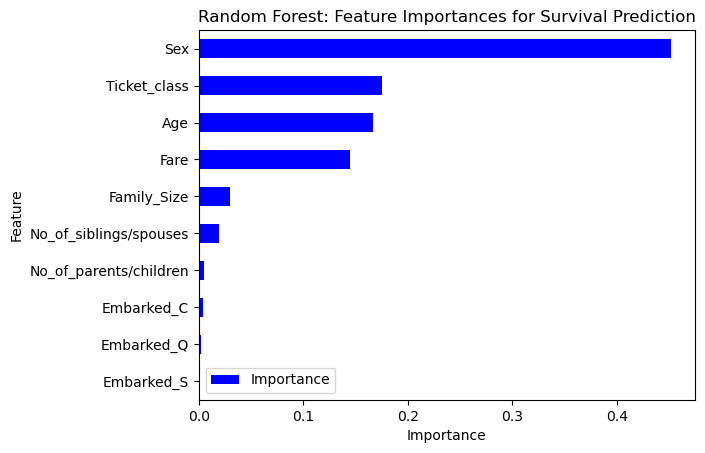

In [226]:
# Getting feature importances
feat_impt = rf1.best_estimator_.feature_importances_

# Getting indices of top 10 features
ind = np.argpartition(rf1.best_estimator_.feature_importances_, -10)[-10:]

# Getting column labels of top 10 features 
feat = X.columns[ind]

# Filtering `feat_impt` to consist of top 10 feature importances
feat_impt = feat_impt[ind]

y_df = pd.DataFrame({"Feature":feat,"Importance":feat_impt})
y_sort_df = y_df.sort_values("Importance")
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance", color='Blue')

ax1.set_title("Random Forest: Feature Importances for Survival Prediction", fontsize=12)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")

plt.show()

The barplot displays mean decrease in impurity values for various features in a Random Forest model predicting Titanic survival. Individual passenger characteristics, notably Sex, Ticket_class, and Age, stand out as the most influential, aligning with expectations for survival factors. Family relationships exhibit lower importance, indicating a limited impact on survival prediction. Embarkation location play minor roles, as suggested by their minimal mean decrease in impurity values. 

### Summary of Model Results

#### Logistic Regression
The performance of the Logistic Regression model in predicting Titanic survival was deemed satisfactory. It displayed an accuracy of 79%, with a precision of 71.8% and recall of 67% specifically for the 'Survived' class. The F1-score, harmonizing precision and recall, was recorded at 69%. Despite the model exhibiting commendable precision and accuracy for identifying non-survivors, there exists potential for enhancement in predicting survivors, as evidenced by the F1-score and recall metrics.

#### Tree- base Model
The Decision Tree model achieved an accuracy of 79.2%, with a precision of 73.97% and recall of 75%. The F1 Score, combining precision and recall, was approximately 74.48%. The model demonstrated a balanced trade-off between precision and recall, showcasing reasonable ability to classify passengers into survival categories.

#### Random Forest
The Random Forest model, with optimized hyperparameters, outperformed the Decision Tree with a cross-validated AUC of approximately 0.836. On the test set, it demonstrated a precision of 83.9%, recall of 72.2%, F1-score of 77.6%, and an accuracy of 83.1%. The Random Forest model's key features, such as Sex, Ticket_class, and Age, aligned with expectations for survival factors, and its performance surpassed that of the Decision Tree model.

### Conclusion, Recommendations, Next Steps

**Conclusion:**
The Logistic Regression model and both tree-based models (Decision Tree and Random Forest) show promising results in predicting Titanic survival.

Individual passenger characteristics, such as Sex, Ticket_class, and Age, play crucial roles in survival predictions, aligning with expectations.

The Random Forest model demonstrates enhanced discriminatory power compared to the Decision Tree, as indicated by higher AUC and test set performance metrics.

**Recommendations:**
Model Selection: Considering the higher performance of the Random Forest model, it is recommended for deployment in predicting Titanic survival due to its robustness and improved discriminatory power.

Feature Insights: Insights from feature importance analyses can be used to enhance interpretability and guide further exploration of factors influencing survival outcomes.

Refinement: Continue refining the models by exploring additional hyperparameter tuning, feature engineering, and evaluating the impact of different feature sets.

**Next Steps:**

Ensemble Models: Explore ensemble models that combine the strengths of different algorithms for further improvement in predictive performance.

Validation: Validate the models on additional datasets or perform cross-validation with more folds to ensure generalizability.

Deployment: Deploy the selected model (Random Forest) in a real-world scenario and monitor its performance over time, considering periodic updates and refinements.

Feedback Loop: Establish a feedback loop to continuously improve the model based on new data, user feedback, and changing patterns in survival factors.
